In [1]:
import os
import csv
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import logging

import tempfile
import traceback
from signal_processing import detect_peaks, plot_peaks, filter_ppg
from pyPPG.datahandling import load_data

import pyPPG
from pyPPG import PPG, Fiducials, Biomarkers
from pyPPG.datahandling import load_data, plot_fiducials, save_data, load_fiducials
import pyPPG.preproc as PP
import pyPPG.fiducials as FP
import pyPPG.biomarkers as BM
import pyPPG.ppg_sqi as SQI

import numpy as np
import sys
import json
import pandas as pd
import scipy.io

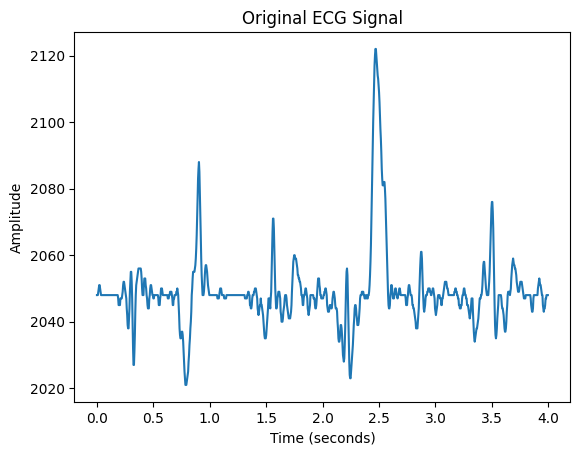

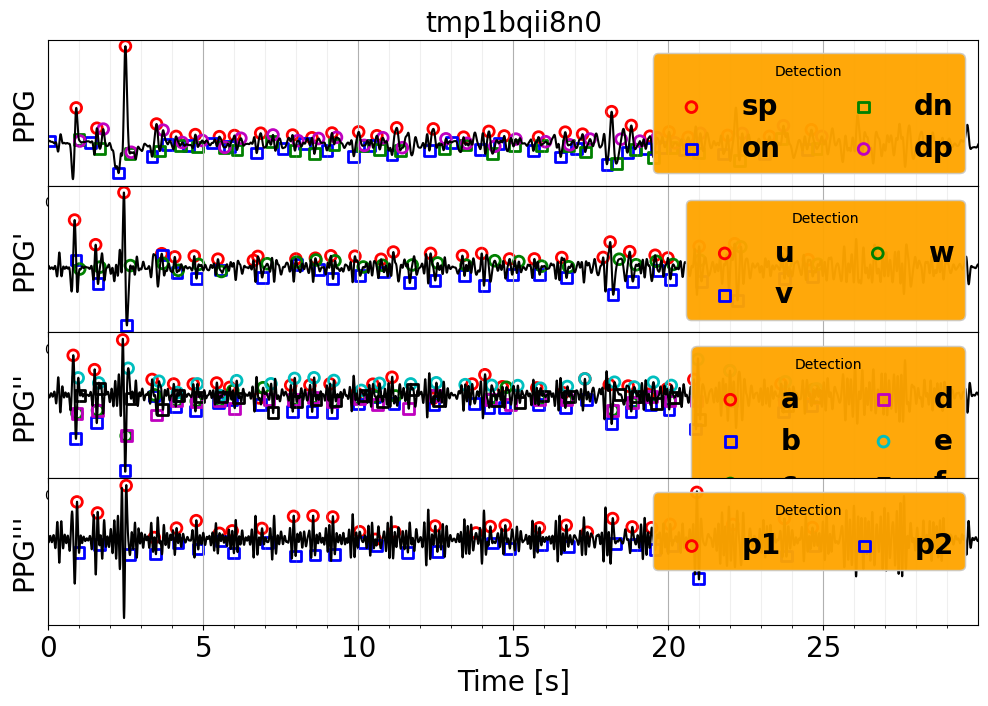

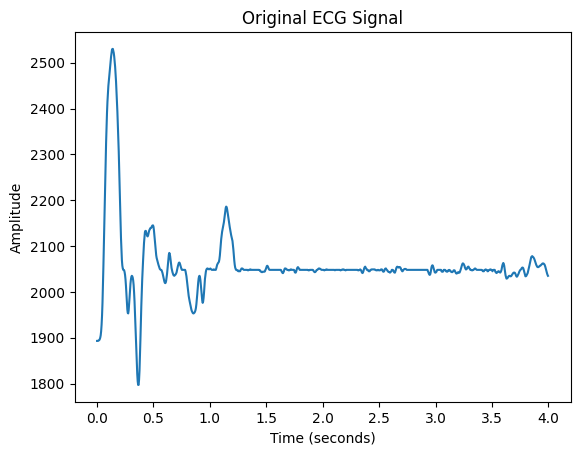

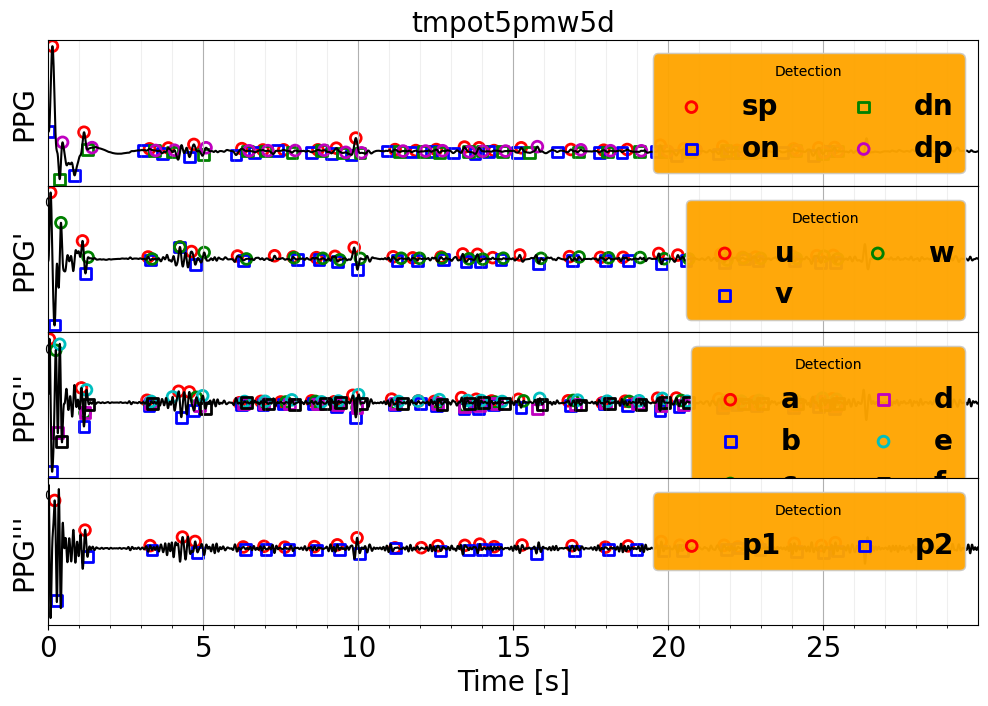

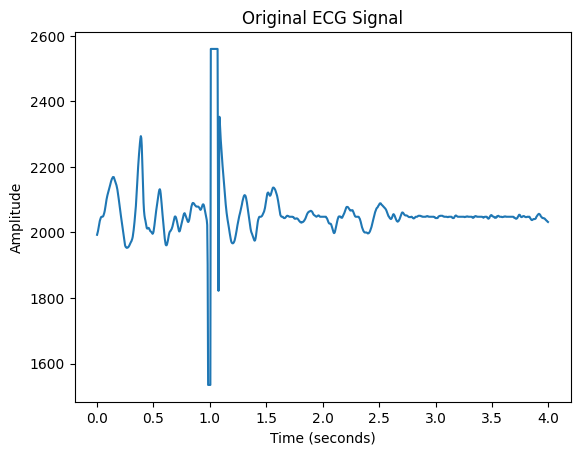

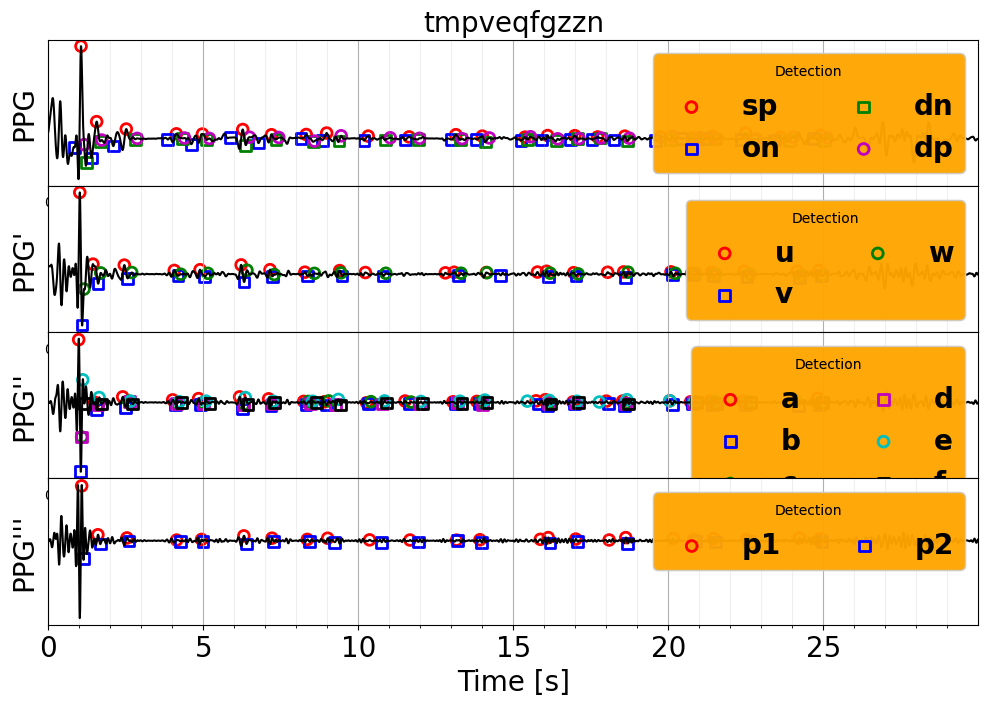

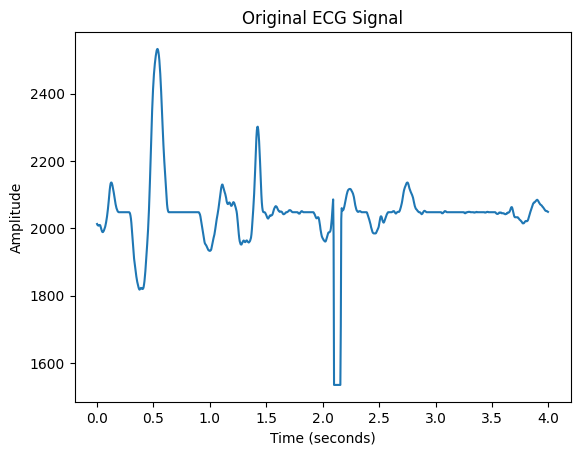

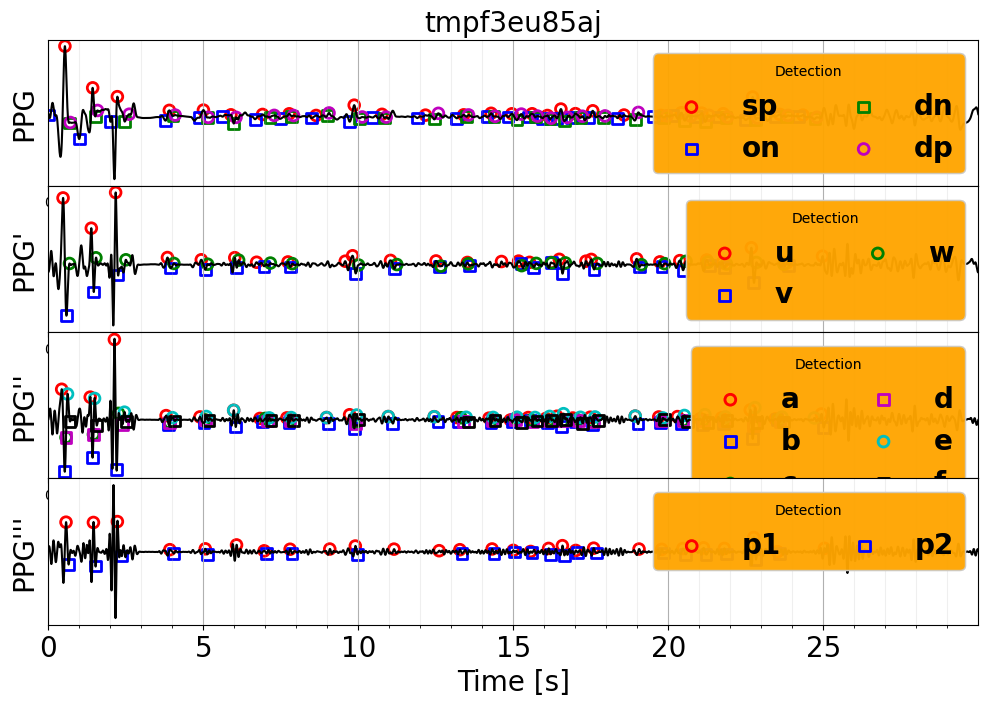

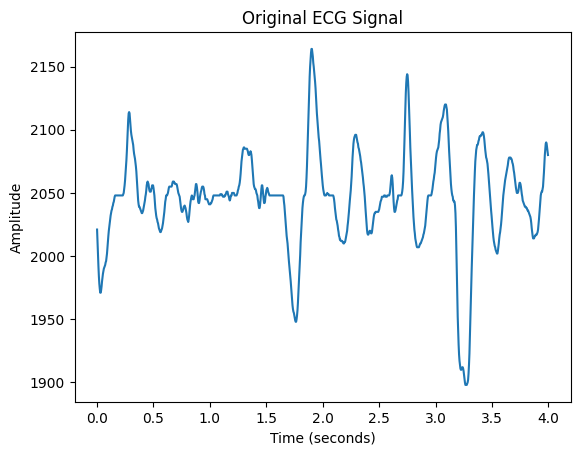

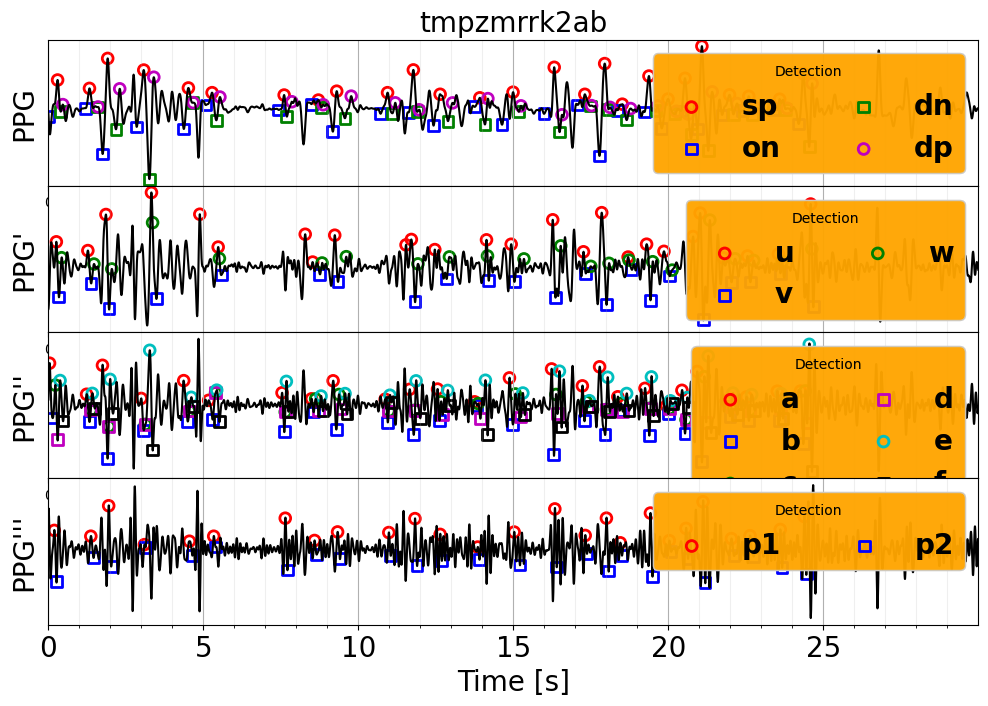

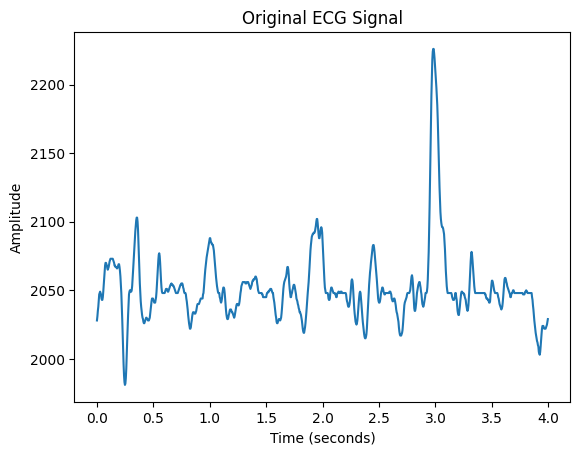

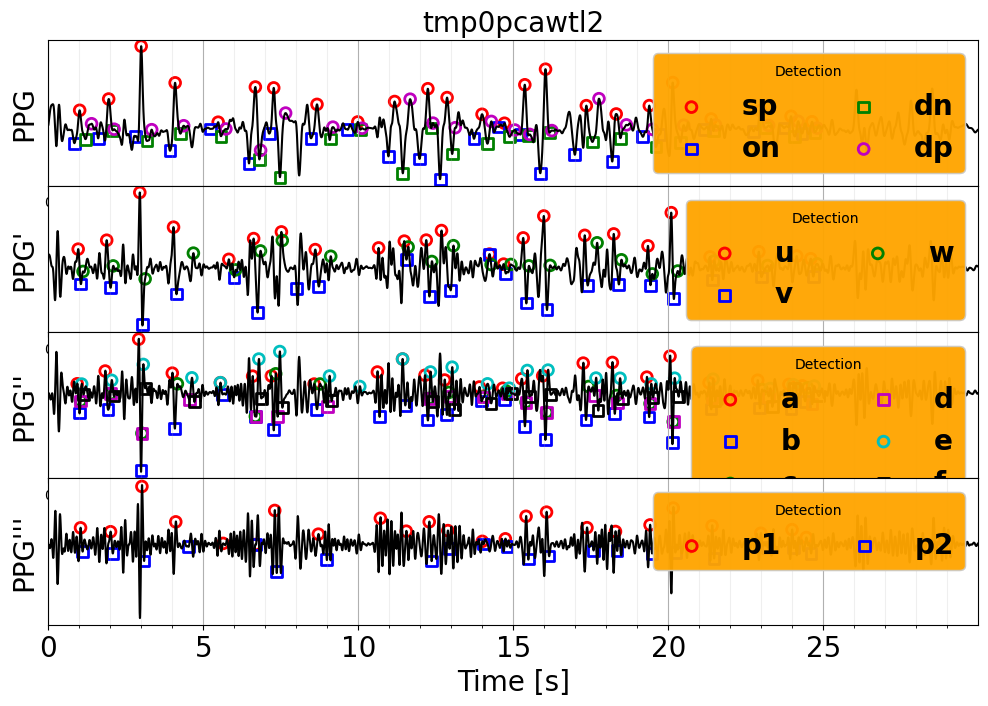

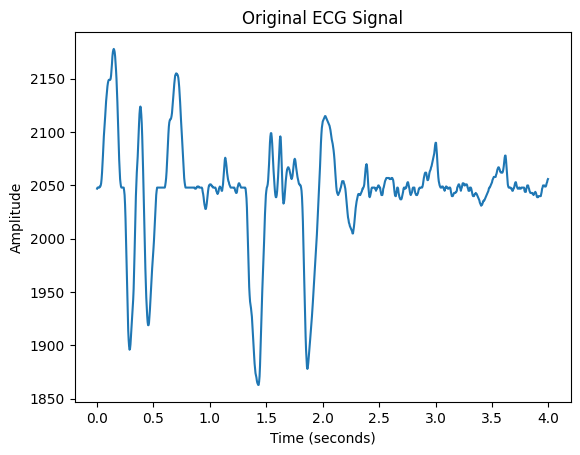

KeyboardInterrupt: 

In [3]:
data = pd.read_csv("assets/data_predicted.csv", index_col='N')

for index, row in data.iterrows():
    if pd.isna(row['Recording']):
        continue

    # Read the ECG signal
    with open(f"assets/ecg/{row['Recording']}.dat", 'rb') as f:
        values = np.frombuffer(f.read(), dtype=np.int16)
        T = 30 / len(values)  # all recording have a duration of 30 seconds
        fps = 1 / T

    time = np.arange(0, len(values[:1000])) *T
    plt.plot(time, values[:1000])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title('Original ECG Signal')
    plt.show()

    with tempfile.NamedTemporaryFile(suffix='.mat') as temp:
        scipy.io.savemat(temp.name, {
            'Data': values,
            'Fs': fps,
        })
        signal = load_data(data_path=temp.name, fs=0, start_sig=0, end_sig=-1, channel="Pleth", use_tk=True, print_flag=True)

    # Preprocess the signal
    fL=0.5000001
    fH=12
    order=4
    sm_wins={'ppg':50,'vpg':10,'apg':10,'jpg':10}
    prep = PP.Preprocess(fL=fL, fH=fH, order=order, sm_wins=sm_wins)

    signal.filtering = True
    signal.fL = fL
    signal.fH = fH
    signal.order = order
    signal.sm_wins = sm_wins
    signal.ppg, signal.vpg, signal.apg, signal.jpg = prep.get_signals(s=signal)

    # Fiducial points
    correction=pd.DataFrame()
    corr_on = ['on', 'dn', 'dp', 'v', 'w', 'f']
    correction.loc[0, corr_on] = True
    signal.correction=correction
    s = PPG(s=signal, check_ppg_len=True)

    fpex = FP.FpCollection(s=s)
    fiducials = fpex.get_fiducials(s=s)
    fp = Fiducials(fp=fiducials)
    plot_fiducials(s=s, fp=fp, savefig=False, show_fig=True, print_flag=True, use_tk=False)






In [ ]:
fiducials

In [ ]:
import cv2
import numpy as np
import time
import logging
import tempfile
import copy
import traceback
from pyPPG import PPG, Fiducials
from pyPPG.datahandling import load_data
import pyPPG.fiducials as FP

import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, tf2zpk, freqz, cheby2, firwin
from scipy.signal import kaiserord, firwin, filtfilt, detrend, periodogram, lfilter, find_peaks, firls, resample
from dotmap import DotMap


s = PPG(s=signal, check_ppg_len=True)
s


corr_on = ['on', 'dn', 'dp', 'v', 'w', 'f']
correction=pd.DataFrame()
correction.loc[0, corr_on] = True
signal.correction=correction

# Extract fiducial points
fpex = FP.FpCollection(s=s)
self = fpex

# Extract Fiducial Points
ppg_fp=pd.DataFrame()
peaks, onsets = fpex.get_peak_onset('PPGdet')

In [ ]:
plt.plot(s.ppg)

In [ ]:
fps

In [ ]:
# extract array from df
json.loads(data.loc[1, 'points_sp'])

In [ ]:
data

In [ ]:
path = "assets/ecg/15:53:33.dat"
with open(path, 'rb') as f:
    values = np.frombuffer(f.read(), dtype=np.int16)
    T = 30 / len(values)  # all recording have a duration of 30 seconds
plt.plot(values)
plt.show()

time = np.arange(0, len(values[:1000])) *T
plt.plot(time, values[3000:4000])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
data.to_csv("assets/data_predicted_analyzed.csv", quoting=csv.QUOTE_ALL)